# ChatBot


In this notebook, we are going to create a chatbot that takes as an input a FAQ from a website. The Natural Language Toolkit (NLTK) python package will be used to teach our robot.



## Objective:

Create a functional chatbot that can interact with human in Japanese language.

### Table of Contents

<b>1.DATA ANALYSIS</b>
* 1.1.Import
* 1.2.Wordcloud

<b>2.Natural Language Toolkit</b>
* 2.1.Training
* 2.2.Conclusion

## 1.DATA ANALYSIS
### 1.1.Import

In [1]:
#conda install -c conda-forge wordcloud=1.8.1
#conda install -c conda-forge jieba
#pip install chatterbot
import nltk
import random
import string
import jieba 
import imageio
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

jieba will create a list of unique words of the imported text file.

In [8]:
#importing text file
with open('C:/Users/PC/Downloads/TXT/amazon.txt', 'r', encoding="utf8") as f1:
    list1 = f1.read()
    list2 = jieba.lcut(list1)

In [9]:
list1.split("\n")[0]

'What can I return?'

### 1.2.Wordcloud

wordcloud package shows the most used word of the dataset.

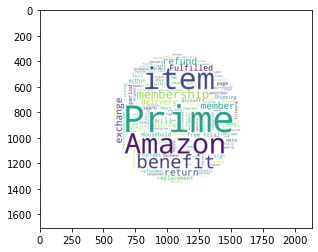

In [12]:
#WordCloud of the most used words
mask=imageio.imread("C:/Users/PC/FLAG1.png")
words=" ".join(list2)
wc=WordCloud(
    width=1000,
    height=800,
    background_color='white',
    mask=mask
).generate(words).to_file("V3.png")

plt.imshow(mpimg.imread('V3.png'))

## 2.Natural Language Toolkit
### 2.1.Training

In [13]:
raw=list1

#convert to lowercase
raw=raw.lower()

#converts to list of sentences 
sent_tokens = nltk.sent_tokenize(raw)
#converts to list of words
word_tokens = nltk.word_tokenize(raw)

#LemTokens take as input the tokens and return normalized tokens
lemmer = nltk.stem.WordNetLemmatizer()

def LemTokens(tokens):
    return [lemmer.lemmatize(token) for token in tokens]

In [14]:
#remove punctuation
remove_punct_dict = dict((ord(punct), None) for punct in string.punctuation)

def LemNormalize(text):
    return LemTokens(nltk.word_tokenize(text.lower().translate(remove_punct_dict)))


GREETING_INPUTS = ["hello", "hi", "hey"]
GREETING_RESPONSES = ["hi", "hey", "hi there"]

In [15]:
# Checking for greetings
def greeting(sentence):
    """If user's input is a greeting, return a greeting response"""
    for word in sentence.split():
        if word.lower() in GREETING_INPUTS:
            return random.choice(GREETING_RESPONSES)

We will use TFidf vectorizer to convert a collection  of raw documents to a 
matrix of TF-IDF features.

We also need to use cosine similarity module from scikit learn library. This will 
be used to find the similarity between words entered by the user and the 
words in the corpus.

We define a function response which searches the user’s utterance for one 
or more known keywords and returns one of several possible responses. If it 
doesn’t find the input matching any of the keywords, it returns a response:
”I am sorry! I don’t understand.”

In [ ]:
#Generating response
def response(user_response):
    bot_response=''
    '''
    stop_words_set
    Terms that were ignored because they either:
        occurred in too many documents (max_df)
        occurred in too few documents (min_df)
        were cut off by feature selection (max_features).
    This is only available if no vocabulary was given.
    '''
    #remove punctuation
    TfidfVec = TfidfVectorizer(tokenizer=LemNormalize, stop_words='english')
    '''
    #fit_transform = learn vocabulary and inverse document frequency (IDF) and
    return document-term matrix.
    '''
    tfidf = TfidfVec.fit_transform(sent_tokens)

    vals = cosine_similarity(tfidf[-1], tfidf)
    #argsort = Returns the indices that would sort an array.
    idx=vals.argsort()[0][-2]
    #flatten = return a copy of the array collapsed into one dimension.
    flat = vals.flatten()
    #sort() method sorts the list ascending by default.
    flat.sort()
    req_tfidf = flat[-2]
    if(req_tfidf==0):
        bot_response=bot_response+"I am sorry! I don’t understand."
        return bot_response
    else:
        '''
        bot_response=''
        sent_tokens = list of answer
        idx = cosine similarity
        '''
        bot_response = bot_response+sent_tokens[idx]
        return bot_response
    
flag=True
print("Bot: I will answer your queries. If you want to exit, type Bye!")

while(flag==True):
    #input user
    user_response = input()
    #lower user writting
    user_response=user_response.lower()
    #if user response is different from bye
    if(user_response!='bye'):
        #if it's thanks, the robot answer: you are welcome
        if(user_response=='thanks' or user_response=='thank you' ):
            flag=False
            print("Bot: You are welcome..")
        else:
            #if it is a greeting response
            if(greeting(user_response)!=None):
                #the robot answer by a greeting
                print("Bot: "+greeting(user_response))
            else:
                #append adds an element to the list
                #add the user response to the list of token
                sent_tokens.append(user_response)
                '''
                add to the word tokens list new tokens
                nltk.word_tokenize = Return a tokenized copy of text, using 
                NLTK's recommended word tokenizer 
                '''
                word_tokens=word_tokens+nltk.word_tokenize(user_response)
                final_words=list(set(word_tokens))
                print("Bot: ",end="")
                #we generate a response with this function
                print(response(user_response))
                sent_tokens.remove(user_response)
    else:
        flag=False
        print("Bot: Bye! take care..")  

Bot: I will answer your queries. If you want to exit, type Bye!
refund
Bot: most refunds are fully refunded within 7 days after we receive and process your return.
Fulfilled by Amazon
Bot: fulfilled by amazon
items "fulfilled by amazon" (fba) are offered by a third-party seller, but shipped to you from an amazon fulfillment center.
exchanges
Bot: if you would like to exchange an item for another, you can exchange for a different size or color or for an item in your cart.


### Conclusion

We managed to create a ChatBot by using NLTK that reads a text file and answer to customer questions. In order to get a more precise answer, we need to create precise questions and answers in the text file.